## Setup

In [0]:
# Colab setup
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
!pip install spotipy
!pip install PyLyrics

  Created wheel for spotipy: filename=spotipy-2.4.4-cp36-none-any.whl size=12336 sha256=72f8a683f72364e30c60fa629fd70d14e4711c7822682dbfee03c7550c0fdbc4
  Stored in directory: /root/.cache/pip/wheels/76/28/19/a86ca9bb0e32dbd4a4f580870250f5aeef852870578e0427e6
Successfully built spotipy
  Created wheel for PyLyrics: filename=PyLyrics-1.1.0-cp36-none-any.whl size=3579 sha256=280198791bf400e3df29ba3660f4a01617f52a94dea38f81a903ee9dd7e835c5
  Stored in directory: /root/.cache/pip/wheels/75/41/30/3aaf00a1c51003972eec70fb44fe9384586fab06e241aa706d
Successfully built PyLyrics


In [0]:
import spotipy
import time
import numpy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
from PyLyrics import *

username = 'bgn4fn3tb3z7e4swnjhul2ea2'
client_id = "4d7bbe7b027e4aef83bc9977eec55a1d"
client_secret = "ed98ef4b3837459eb5af036ba1cf8e29"

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
plists = {}

## Scraping

In [0]:
def get_features_for_playlist(uri, username):
    # time.sleep(5)
    playlist_id = uri.split('/')[4]
    print(playlist_id)

    try:
      results = spotify.user_playlist(username, playlist_id)
    except:
      pass
    
    # initialize the dictionary
    playlist_name = results['name']
    plists[playlist_name] = {}
    plists[playlist_name]['name'] = []
    plists[playlist_name]['track uri'] = []
    plists[playlist_name]['artist'] = []
    plists[playlist_name]['followers'] = []
    plists[playlist_name]['artist_popularity'] = []
    plists[playlist_name]['release_date'] = []
    plists[playlist_name]['lyrics'] = []
    plists[playlist_name]['duration_ms'] = []
    plists[playlist_name]['song_popularity'] = []
    plists[playlist_name]['explicit'] = []
    
    # plists[playlist_name]['views'] = []
    # plists[playlist_name]['likes'] = []
    # plists[playlist_name]['dislikes'] = []
    # plists[playlist_name]['comments'] = []
    
    plists[playlist_name]['acousticness'] = []
    plists[playlist_name]['danceability'] = []
    plists[playlist_name]['energy'] = []
    plists[playlist_name]['instrumentalness'] = []
    plists[playlist_name]['liveness'] = []
    plists[playlist_name]['loudness'] = []
    plists[playlist_name]['speechiness'] = []
    plists[playlist_name]['tempo'] = []
    plists[playlist_name]['valence'] = []

    for track in results['tracks']['items']:

        # save metadata stuff
        
        try:
          name = track['track']['name']
        except:
          name = "SCAM"
          
        # print(name)
        track_uri = track['track']['uri']

        try:
          artist = track['track']['artists'][1]['name']
        except:
          artist = track['track']['artists'][0]['name']

        try:
          plists[playlist_name]['name'].append(name)
          plists[playlist_name]['track uri'].append(track_uri)
          plists[playlist_name]['artist'].append(artist)
          plists[playlist_name]['release_date'].append(track['track']['album']['release_date'])
          plists[playlist_name]['duration_ms'].append(track['track']['duration_ms'])
          plists[playlist_name]['song_popularity'].append(track['track']['popularity'])
          plists[playlist_name]['explicit'].append(track['track']['explicit'])
        except:
          plists[playlist_name]['name'].append(0)
          plists[playlist_name]['track uri'].append(0)
          plists[playlist_name]['artist'].append(0)
          plists[playlist_name]['release_date'].append(0)
          plists[playlist_name]['duration_ms'].append(0)
          plists[playlist_name]['song_popularity'].append(0)
          plists[playlist_name]['explicit'].append(0)

        
        # Youtube info
        # test = youtube_search(name + artist)
        # try:
        #   plists[playlist_name]['views'].append(test['viewCount'][0])
        #   plists[playlist_name]['likes'].append(test['likeCount'][0])
        #   plists[playlist_name]['dislikes'].append(test['dislikeCount'][0])
        #   plists[playlist_name]['comments'].append(test['commentCount'][0])
        
        # except:
        #   plists[playlist_name]['views'].append('Not found')
        #   plists[playlist_name]['likes'].append('Not found')
        #   plists[playlist_name]['dislikes'].append('Not found')
        #   plists[playlist_name]['comments'].append('Not found')

        # artist info
        try:
          results = spotify.search(q='artist:' + artist, type='artist')
          items = results['artists']['items']
        except:
          pass

        try:
          plists[playlist_name]['followers'].append(items[0]['followers']['total'])
          plists[playlist_name]['artist_popularity'].append(items[0]['popularity'])
        except:
          plists[playlist_name]['followers'].append(0)
          plists[playlist_name]['artist_popularity'].append(0)

        try:
            # lyrics
            plists[playlist_name]['lyrics'].append(PyLyrics.getLyrics(artist,name))
        
        except:
            print('LYRICS NOT FOUND!!!')
            plists[playlist_name]['lyrics'].append('NO LYRICS')
        
        # extract features
        try:
          features = spotify.audio_features(track_uri)
          plists[playlist_name]['acousticness'].append(features[0]['acousticness'])
          plists[playlist_name]['danceability'].append(features[0]['danceability'])
          plists[playlist_name]['energy'].append(features[0]['energy'])
          plists[playlist_name]['instrumentalness'].append(features[0]['instrumentalness'])
          plists[playlist_name]['liveness'].append(features[0]['liveness'])
          plists[playlist_name]['loudness'].append(features[0]['loudness'])
          plists[playlist_name]['speechiness'].append(features[0]['speechiness'])
          plists[playlist_name]['tempo'].append(features[0]['tempo'])
          plists[playlist_name]['valence'].append(features[0]['valence'])
        except:
          plists[playlist_name]['acousticness'].append(0)
          plists[playlist_name]['danceability'].append(0)
          plists[playlist_name]['energy'].append(0)
          plists[playlist_name]['instrumentalness'].append(0)
          plists[playlist_name]['liveness'].append(0)
          plists[playlist_name]['loudness'].append(0)
          plists[playlist_name]['speechiness'].append(0)
          plists[playlist_name]['tempo'].append(0)
          plists[playlist_name]['valence'].append(0)

    return plists 

In [0]:
output = {}
uris = pd.read_csv('playlists.csv')
uris.head()

,PlayListID,Genre
0,https://open.spotify.com/playlist/6yIGwQ7pz2lH...,Metal
1,https://open.spotify.com/playlist/57XZQcQg7vyd...,Metal
2,https://open.spotify.com/playlist/38OyccSqC4Ir...,Metal
3,https://open.spotify.com/playlist/37i9dQZF1DX1...,Rap
4,https://open.spotify.com/playlist/3JlmwHsilEdm...,Rap


In [0]:
try:
  for each in range(125,len(uris)):
    output[uris.loc[each, 'Genre']] = get_features_for_playlist(uris.loc[each, 'PlayListID'], username)
except:
  print('Error Fetching :(')

0kzBlSA2mPehp3qLuhUilg


/usr/local/lib/python3.6/dist-packages/PyLyrics/functions.py:78: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 78 of the file /usr/local/lib/python3.6/dist-packages/PyLyrics/functions.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  s = BeautifulSoup(r.text)


LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
37i9dQZF1DWXRAIdXzR5R1
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!!!
LYRICS NOT FOUND!

In [0]:
# print(each)

144


In [0]:
pl_name = uris.loc[0,'Genre']

final = pd.DataFrame(pd.DataFrame(output)[pl_name][pd.DataFrame(output)[pl_name].index.values[0]])
final['Playlist_Name'] = pd.DataFrame(output)[pl_name].index.values[0]

for each in range(1, len(pd.DataFrame(output)[pl_name])):
  try:
    pl_df = pd.DataFrame(pd.DataFrame(output)[pl_name][pd.DataFrame(output)[pl_name].index.values[each]])
    pl_df['Playlist_Name'] = pd.DataFrame(output)[pl_name].index.values[each]
    final = pd.concat([final, pl_df])
  except:
    pass

print(final.shape)
len(final[final['lyrics']!='NO LYRICS'])

(9693, 20)


4068

In [0]:
df_with_lyrics = final[final['lyrics']!='NO LYRICS']
df_with_lyrics.reset_index(inplace = True, drop = True)
df_with_lyrics.shape

(4068, 20)

In [0]:
# df.to_csv('lyrics30nv_morning.csv', index = False)
# df = pd.read_csv('lyrics30nv_morning.csv')

In [0]:
df_without_lyrics = final[final['lyrics']=='NO LYRICS']
df_without_lyrics.reset_index(inplace = True, drop = True)
df_without_lyrics.shape

(5625, 20)

In [0]:
## Scraping the leftover lyrics from Genius.com using BeautifulSoup
import requests
from bs4 import BeautifulSoup
import re

count = 1
for each in range(len(df_without_lyrics)):
  song_name = '-'.join(str(df_without_lyrics.loc[each, 'name']).split(' '))
  artist_name = '-'.join(str(df_without_lyrics.loc[each, 'artist']).split(' '))
  url_end = artist_name + '-' + song_name

  URL = 'https://genius.com/' + url_end + '-lyrics'

  try:
    page = requests.get(URL)
    html = BeautifulSoup(page.text, "html.parser") # Extract the page's HTML as a string

    # Scrape the song lyrics from the HTML
    lyrics = html.find("div", class_="lyrics").get_text()
    df_without_lyrics.loc[each, 'lyrics'] = lyrics

  except:
    print(each, count)
    count+=1

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


10 10
12 11
13 12
14 13
15 14
16 15
17 16
18 17
19 18
20 19
21 20
22 21
23 22
24 23
25 24
26 25
27 26
28 27
29 28
30 29
31 30
33 31
35 32
36 33
37 34
40 35
41 36
42 37
43 38
44 39
46 40
47 41
48 42
49 43
51 44
52 45
53 46
54 47
55 48
56 49
57 50
58 51
59 52
60 53
62 54
63 55
64 56
65 57
67 58
68 59
70 60
71 61
72 62
73 63
75 64
76 65
78 66
79 67
80 68
81 69
82 70
83 71
84 72
85 73
86 74
87 75
88 76
89 77
90 78
91 79
92 80
93 81
94 82
96 83
97 84
100 85
101 86
102 87
103 88
106 89
107 90
108 91
109 92
110 93
111 94
113 95
114 96
115 97
116 98
117 99
118 100
119 101
120 102
122 103
123 104
124 105
125 106
126 107
127 108
128 109
129 110
131 111
132 112
133 113
134 114
136 115
138 116
140 117
143 118
144 119
147 120
150 121
151 122
153 123
154 124
155 125
156 126
159 127
161 128
162 129
163 130
165 131
166 132
167 133
168 134
172 135
173 136
177 137
179 138
181 139
182 140
186 141
187 142
190 143
194 144
195 145
196 146
199 147
202 148
203 149
204 150
205 151
208 152
209 153
211 154
212 1

In [0]:
df_without_lyrics = df_without_lyrics[df_without_lyrics['lyrics']!='NO LYRICS']
df_without_lyrics.reset_index(inplace = True, drop = True)
df_without_lyrics.shape

(1412, 20)

In [0]:
df_without_lyrics.shape, df_with_lyrics.shape

((1412, 20), (4068, 20))

In [0]:
df = pd.concat([df_with_lyrics, df_without_lyrics]).reset_index(drop = True)
df.head()

,name,track uri,artist,followers,artist_popularity,release_date,lyrics,duration_ms,song_popularity,explicit,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Playlist_Name
0,God Is Dead?,spotify:track:42wFRybIJ2n5RoD7r9R8Rz,Black Sabbath,4027757,77,2013-01-01,Lost in the darkness\nI fade from the light\nF...,532266,2,False,0.000187,0.378,0.733,0.001950,0.0582,-4.935,0.0331,118.454,0.164,Top 100 Metal Tracks on Spotify
1,The Enemy Inside,spotify:track:1ZR4QAYsiO9zPsGaMPW2OI,Dream Theater,941336,68,2013-09-16,Over and over again\nI relive the moment\nI'm ...,377373,52,False,0.000012,0.488,0.976,0.029500,0.0670,-4.165,0.1420,143.988,0.404,Top 100 Metal Tracks on Spotify
2,Temper Temper,spotify:track:2weyHZ3Rk4PZVZODz1asqz,Bullet For My Valentine,1767902,73,2013-02-08,This time you'd better bite your tongue\nThink...,188866,49,False,0.001560,0.439,0.987,0.000016,0.4240,-3.576,0.2200,163.393,0.378,Top 100 Metal Tracks on Spotify
3,Heartbreaker,spotify:track:7GwtlmQVrqyoggPraFXXvJ,Motörhead,1966405,70,2013-10-18,Careful where you stand now boy\nEverything ha...,185016,41,False,0.000103,0.452,0.995,0.359000,0.2040,-3.958,0.0752,100.043,0.237,Top 100 Metal Tracks on Spotify
4,End Of The Beginning,spotify:track:4ZDRzrXIW3EdC5FR0HGi3v,Black Sabbath,4027757,77,2013-01-01,Is this the end of the beginning\nOr the begin...,486226,0,False,0.000083,0.309,0.882,0.107000,0.0976,-4.054,0.0629,123.558,0.174,Top 100 Metal Tracks on Spotify


In [0]:
df.shape

(5480, 20)

In [0]:
df.to_csv('initial_data.csv', index = False)

In [0]:
#importing cleaned data
df = pd.read_csv('initial_data_cleaned.csv')
df.shape

(2977, 20)

In [0]:
## Detch listener counts from Last FM

!pip install pylast
import pandas as pd
import pylast

#Authentication for Last FM API
username = 'vishal_r'
password_hash = pylast.md5('Vishal!@34')
LASTFM_API_KEY = '5003bc0d910c88b15c2667f810b11f33'
LASTFM_SHARED_SECRET = '6ce88de653a92e2aa9bfc796aa1be559'

network = pylast.LastFMNetwork(api_key=LASTFM_API_KEY, api_secret=LASTFM_SHARED_SECRET,
                               username=username, password_hash=password_hash)
user = network.get_authenticated_user()

In [0]:
for each in range(len(df)):
  try:
    df.loc[each,'listener_count'] = (network.get_track(df.loc[each,'artist'], df.loc[each,'name'])).get_listener_count()
  except:
    df.loc[each,'listener_count'] = 1000
    print(each)

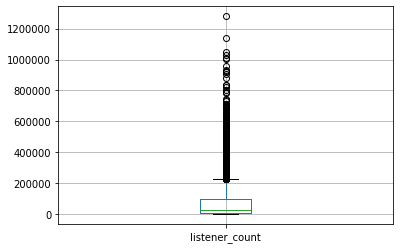

In [0]:
df.boxplot(column = ['listener_count'])

## Data Pre-Processing

In [0]:
!pip install nltk
import nltk
import re
import gensim
from gensim.utils import simple_preprocess
from gensim.test.utils import common_corpus, common_dictionary
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
final_lyrics = []
all_words = []
df['filtered_lyrics'] = ''


# try:
for each in range(len(df)):

  try:
    cleaned_lyrics = (re.sub(r"[,.:;?'\")(!]\d", ' ', str(df.loc[each,'lyrics']))).lower()
  except:
    cleaned_lyrics = 'no'

  lemmatized_lyrics = lemmatizer.lemmatize(cleaned_lyrics)
  tokenized_lyrics = word_tokenize(lemmatized_lyrics)
  filtered_lyrics = [w for w in tokenized_lyrics if not w in stop_words]
  filtered_lyrics = [w for w in filtered_lyrics if len(w) > 2]

  for i in filtered_lyrics:
    all_words.append(i)

  final_lyrics.append(filtered_lyrics)

  filtered_lyrics = ' '.join(filtered_lyrics)
  df.loc[each, 'filtered_lyrics'] = filtered_lyrics

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
df.shape

(2977, 22)

## Genesim Topic Modeling

In [0]:
# Genesim topic modeling
# dictionary = gensim.corpora.Dictionary(final_lyrics)
# dictionary.filter_extremes(no_below=1, no_above=0.5)

# bow_corpus = [dictionary.doc2bow(label) for label in final_lyrics]

# lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=6, id2word=dictionary\
#                                        , passes=2, workers=2, random_state=3)

# lda_model.print_topics()

In [0]:
# from nltk.util import ngrams
# from collections import Counter

# unigram = Counter(ngrams(all_words, 1))
# output = pd.DataFrame.from_dict(unigram, orient='index').reset_index()

# output.columns = ['Word', 'Count']
# output = output.sort_values(by = ['Count'], ascending = False)
# for each in range(len(output)):
#     output.loc[each,'Word'] = str(output.loc[each,'Word'])[2:-3]
# output.reset_index(inplace = True)
# output = output.drop('index', axis = 1)
# output.to_csv('ngram.csv')
# output['Word'][:10]

In [0]:
# to_be_removed = set(output['Word'][0:20]) - set(['love', 'baby', 'make','know','want','time','let','see','make','feel','right','need'])

In [0]:
# dictionary = gensim.corpora.Dictionary(final_lyrics)
# dictionary.filter_extremes(no_below=1, no_above=0.5)

# bow_corpus = [dictionary.doc2bow(list(set(label) - to_be_removed)) for label in final_lyrics]

# lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, chunksize = 64, eval_every = 5, per_word_topics = 3, minimum_probability = 0.1, passes=25, random_state=23)

# lda_model.print_topics()

## Sklearn topic modeling

In [0]:
df = pd.read_csv('songs.csv')

In [0]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 6.4MB/s 
     |████████████████████████████████| 552kB 42.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=1d9af7a48d1ababecc540e049fd46b2e8c92691acd9d5b7489f0eb0d8a22ec0b
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32040 sha256=264f7cbec0cfcb1acb2d3b770c1be9ec4430a3da67beca5551600c1728713690
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
# Run in terminal or command prompt
# python3 -m spacy download en

import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(df.loc[:, 'filtered_lyrics'])

In [0]:
# Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  1.9023609083483932 %


In [0]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=4,            # Number of topics
                                      max_iter=25,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=102,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=25,
                          mean_change_tol=0.001, n_components=4, n_jobs=-1,
                          perp_tol=0.1, random_state=102, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [0]:
# 4
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      112.094536 -399.837738       1        1  36.297229
0      218.416718 -376.957825       2        1  27.533327
3       89.211571 -293.516235       3        1  25.850376
1      195.533722 -270.636322       4        1  10.319068, topic_info=     Category         Freq   Term        Total  loglift  logprob
1388  Default  5891.000000   love  5891.000000  30.0000  30.0000
85    Default  3345.000000   baby  3345.000000  29.0000  29.0000
2700  Default  6609.000000   yeah  6609.000000  28.0000  28.0000
163   Default  1681.000000  bitch  1681.000000  27.0000  27.0000
2055  Default  1774.000000   shit  1774.000000  26.0000  26.0000
...       ...          ...    ...          ...      ...      ...
1555   Topic4   219.579819   need  2298.841605  -0.0773  -5.0947
436    Topic4   209.081115   come  2148.153302  -0.0585  -5.1437
1324   Topic4   187.694454   life  1760.019540   0.0329  -5.2516
1311   Topic4   174.963833    let  3538.967346  -0.7358  -5.3219
952    Topic4   168.434283    gon  2367.567837  -0.3719  -5.3599

[326 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
1         4  0.978079  20090423154754
13        4  0.987158           adore
28        1  0.002717           alive
28        2  0.008150           alive
28        3  0.988811           alive
...     ...       ...             ...
2700      1  0.450089            yeah
2700      2  0.518018            yeah
2700      3  0.008472            yeah
2700      4  0.023299            yeah
2710      3  0.986001           youth

[587 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

In [0]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                 x           y  topics  cluster       Freq
topic                                                     
0      -632.045471 -384.325073       1        1  47.684571
1     -1209.665405  212.164124       2        1  30.574731
2     -1437.453247 -586.322510       3        1  21.740698, topic_info=     Category         Freq   Term        Total  loglift  logprob
1388  Default  5817.000000   love  5817.000000  30.0000  30.0000
2700  Default  6635.000000   yeah  6635.000000  29.0000  29.0000
163   Default  1680.000000  bitch  1680.000000  28.0000  28.0000
2055  Default  1773.000000   shit  1773.000000  27.0000  27.0000
1569  Default  1612.000000  nigga  1612.000000  26.0000  26.0000
...       ...          ...    ...          ...      ...      ...
1037   Topic3   327.154779   head   919.540329   0.4925  -5.4412
2600   Topic3   362.115539    way  2120.001040  -0.2412  -5.3397
1571   Topic3   357.075653  night  1906.087922  -0.1489  -5.3537
1333   Topic3   412.001234   like  7614.319174  -1.3908  -5.2106
335    Topic3   370.462847  cause  3317.385661  -0.6662  -5.3169

[247 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
13        1  0.990700  adore
28        1  0.038206  alive
28        2  0.010916  alive
28        3  0.952412  alive
30        3  0.981665    alt
...     ...       ...    ...
2690      2  0.998069  wrist
2700      1  0.381437   yeah
2700      2  0.613071   yeah
2700      3  0.005425   yeah
2710      3  0.990244  youth

[412 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [0]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -2277363.8880735096
Perplexity:  705.8198488932344
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 20,
 'mean_change_tol': 0.001,
 'n_components': 5,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [0]:
# grid search

# Define Search Param
search_params = {'n_components': [4, 5, 6], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                   

In [0]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 4}
Best Log Likelihood Score:  -790058.8697938327
Model Perplexity:  702.9954407143331


In [0]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(df))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,dominant_topic
Doc0,0,0.94,0,0.06,1
Doc1,0,0.49,0,0.5,3
Doc2,0,0.22,0.33,0.45,3
Doc3,0,0.56,0.07,0.37,1
Doc4,0,0.32,0.09,0.59,3
Doc5,0,0.87,0,0.12,1
Doc6,0.32,0.5,0.18,0,1
Doc7,0,0.99,0,0,1
Doc8,0,0.99,0,0,1
Doc9,0.15,0.44,0.33,0.08,1


In [0]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,3,787
1,2,784
2,1,752
3,0,654


In [0]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
panel

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      165.742569 -235.014664       1        1  30.746533
2      -43.242855 -123.415031       2        1  25.670787
3      117.056900  -74.708618       3        1  24.536452
1        5.443007 -283.720795       4        1  19.046228, topic_info=     Category         Freq   Term        Total  loglift  logprob
1388  Default  5880.000000   love  5880.000000  30.0000  30.0000
85    Default  3344.000000   baby  3344.000000  29.0000  29.0000
1605  Default  2267.000000    ooh  2267.000000  28.0000  28.0000
163   Default  1684.000000  bitch  1684.000000  27.0000  27.0000
1569  Default  1607.000000  nigga  1607.000000  26.0000  26.0000
...       ...          ...    ...          ...      ...      ...
335    Topic4   365.051868  cause  3370.845001  -0.5646  -5.1993
436    Topic4   336.961684   come  2191.919335  -0.2143  -5.2794
1251   Topic4   387.010833   know  6845.050258  -1.2145  -5.1409
952    Topic4   330.232866    gon  2403.659941  -0.3266  -5.2995
1417   Topic4   282.494800   make  2702.452033  -0.6000  -5.4557

[329 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
1         4  0.976270  20090423154754
17        2  0.049372       afternoon
17        3  0.888700       afternoon
30        1  0.018882             alt
30        4  0.981846             alt
...     ...       ...             ...
2700      2  0.193458            yeah
2700      3  0.236465            yeah
2700      4  0.005015            yeah
2710      1  0.022914           youth
2710      4  0.973837           youth

[702 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 2])

Topics: 1- Explicit
2- Love
3- Feel good/Realistic
4- Self-love

In [0]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

,100,20090423154754,able,accept,act,actin,acting,action,actually,add,addicted,addiction,admit,adore,advice,afford,afraid,afternoon,age,ago,ahead,ahh,aim,aiming,air,alarm,album,alcohol,alive,alright,alt,amazing,american,amor,amp,angel,angels,anger,angry,animal,...,worries,worry,worse,worst,worth,worthless,woulda,wound,wounds,wow,wraith,wrap,wrapped,wreck,wrist,write,writing,written,wrong,wrongs,wrote,yah,yard,yea,yeah,year,years,yellow,yes,yesterday,yh5baeaaaealaaaaaabaaeaqaictaeaow,york,young,younger,youth,yuh,yup,zero,zip,zone
Topic0,35.234894,0.250002,0.376158,1.984766,104.279484,57.404088,27.790410,13.967201,3.794928,10.115739,9.756451,2.171328,1.856621,0.253314,3.374664,10.653719,3.343013,0.252359,0.287818,16.956700,45.345264,15.377082,18.780785,0.273930,57.324407,5.304914,17.358883,10.536988,5.880101,25.021039,0.946189,3.361590,0.907281,29.219787,11.799692,2.323295,0.261768,6.802301,0.250928,9.340585,...,2.421544,28.511011,1.601662,1.035590,17.135156,1.209298,2.762967,1.337448,0.259795,53.354068,34.243030,12.557557,4.240676,0.252384,145.224128,19.291110,0.259098,0.258008,39.589779,0.259488,24.666963,66.236386,13.601147,33.912838,3768.333546,61.957824,12.036429,32.140717,62.827373,5.022429,0.250002,28.445049,265.474653,0.254140,1.787482,70.246144,26.242921,4.899350,15.217018,42.770266
Topic1,0.254619,46.249994,4.689536,4.121807,0.256741,0.252530,0.725802,3.961087,4.715333,8.526571,13.835431,9.329013,17.522088,0.253132,15.205756,0.266508,106.449757,0.411557,18.428984,15.655942,9.401899,15.703926,14.228446,2.503380,40.904914,0.395913,2.119413,0.258863,155.547472,30.756587,52.553759,0.269208,38.322691,0.250816,0.254046,69.278558,60.486577,24.410046,6.674798,8.500402,...,0.256624,113.467166,11.021997,34.749342,26.935642,10.520253,27.948429,0.295878,7.449407,0.521807,0.250832,12.911653,2.774721,15.687818,0.262778,52.589859,28.706203,23.646855,93.831860,0.267389,9.637478,0.250690,0.257314,0.261271,33.660193,25.150732,80.606804,5.678092,74.229372,56.372259,23.249994,19.078610,183.443364,6.986300,86.676814,0.250395,0.251661,3.723423,0.252396,0.847305
Topic2,0.256678,0.250002,18.706790,4.351913,31.125467,1.269069,43.285942,0.448572,0.259793,0.251892,0.266090,0.260901,26.477324,12.694778,4.592052,10.101365,40.687502,1.296150,22.717988,3.921036,19.065790,12.562831,0.770398,4.093052,135.698755,0.258174,0.252730,3.200543,7.000554,92.691157,0.250041,37.267761,35.499721,0.275794,13.299262,13.198861,1.987132,0.252438,0.256238,7.799216,...,9.185498,22.969092,2.512618,10.535785,28.697946,1.996624,0.257041,0.270584,0.406157,50.866350,0.254053,8.268337,10.988218,14.640445,0.255679,27.842838,3.238273,15.839513,218.512269,1.510228,15.532940,0.256278,0.638226,7.647556,1291.201226,35.466786,14.764685,7.597804,139.140165,20.904370,0.250002,0.258604,9.005226,8.690223,0.279139,0.252631,0.251698,0.253738,0.271423,21.115662
Topic3,0.253809,0.250002,2.227516,2.541514,35.338309,1.074314,5.197846,1.623141,10.229946,2.105798,19.142027,8.238758,13.143968,64.798777,21.827527,12.978408,51.519728,18.039933,27.565210,12.466321,41.187047,2.356161,17.220371,14.129639,60.071923,16.040999,0.268974,15.003606,204.571872,196.531218,0.250011,19.101441,0.270306,0.253603,16.647000,7.199285,0.264523,0.535216,11.818036,5.359797,...,15.136335,22.052731,37.863723,20.679282,90.231256,0.273825,1.031563,11.096089,10.884641,0.257775,0.252086,0.262452,21.996385,0.419353,0.257415,16.276193,10.796425,0.255624,170.066092,18.962896,23.162619,0.256646,7.503313,11.178335,1531.805035,19.424658,122.592082,4.583388,54.803089,2.700941,0.250002,54.217736,180.076757,12.069337,0.256565,0.250830,0.253719,5.123488,0.259163,30.266767


In [0]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,yeah,like,got,bitch,shit,nigga,fuck,know,money,niggas,man,make,chorus,ayy,gon
Topic 1,let,like,life,away,light,run,world,time,eyes,hold,die,way,know,feel,cause
Topic 2,love,baby,like,know,wan,want,ooh,let,got,girl,yeah,say,make,cause,time
Topic 3,know,yeah,got,cause,chorus,night,feel,time,gon,right,like,verse,come,life,mind


In [0]:
# # Construct the k-means clusters
# from sklearn.cluster import KMeans
# clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)

# # Build the Singular Value Decomposition(SVD) model
# svd_model = TruncatedSVD(n_components=2)  # 2 components
# lda_output_svd = svd_model.fit_transform(lda_output)

# # X and Y axes of the plot using SVD decomposition
# x = lda_output_svd[:, 0]
# y = lda_output_svd[:, 1]

# # Weights for the 15 columns of lda_output, for each component
# print("Component's weights: \n", np.round(svd_model.components_, 2))

# # Percentage of total information in 'lda_output' explained by the two components
# print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

In [0]:
# # Plot
# plt.figure(figsize=(12, 12))
# plt.scatter(x, y, c=clusters)
# plt.xlabel('Component 2')
# plt.xlabel('Component 1')
# plt.title("Segregation of Topic Clusters", )

In [0]:
df_post_topic = pd.concat([df,df_document_topic.reset_index(drop = True)], axis = 1)
df_post_topic.head()

,name,track uri,artist,followers,artist_popularity,release_date,lyrics,duration_ms,song_popularity,explicit,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Playlist_Name,listener_count,filtered_lyrics,Topic0,Topic1,Topic2,Topic3,dominant_topic
0,God Is Dead?,spotify:track:42wFRybIJ2n5RoD7r9R8Rz,Black Sabbath,4027757,77,1/1/2013,Lost in the darkness\nI fade from the light\nF...,532266,2,False,0.000187,0.378,0.733,0.001950,0.0582,-4.935,0.0331,118.454,0.164,Top 100 Metal Tracks on Spotify,139370.0,lost darkness fade light faith father brother ...,0.0,0.94,0.00,0.06,1
1,The Enemy Inside,spotify:track:1ZR4QAYsiO9zPsGaMPW2OI,Dream Theater,941336,68,9/16/2013,Over and over again\nI relive the moment\nI'm ...,377373,52,False,0.000012,0.488,0.976,0.029500,0.0670,-4.165,0.1420,143.988,0.404,Top 100 Metal Tracks on Spotify,72344.0,relive moment bearing burden within open wound...,0.0,0.49,0.00,0.50,3
2,Temper Temper,spotify:track:2weyHZ3Rk4PZVZODz1asqz,Bullet For My Valentine,1767902,73,2/8/2013,This time you'd better bite your tongue\nThink...,188866,49,False,0.001560,0.439,0.987,0.000016,0.4240,-3.576,0.2200,163.393,0.378,Top 100 Metal Tracks on Spotify,58497.0,time better bite tongue think twice open mouth...,0.0,0.22,0.33,0.45,3
3,Heartbreaker,spotify:track:7GwtlmQVrqyoggPraFXXvJ,Motörhead,1966405,70,10/18/2013,Careful where you stand now boy\nEverything ha...,185016,41,False,0.000103,0.452,0.995,0.359000,0.2040,-3.958,0.0752,100.043,0.237,Top 100 Metal Tracks on Spotify,47733.0,careful stand boy everything changed got searc...,0.0,0.56,0.07,0.37,1
4,End Of The Beginning,spotify:track:4ZDRzrXIW3EdC5FR0HGi3v,Black Sabbath,4027757,77,1/1/2013,Is this the end of the beginning\nOr the begin...,486226,0,False,0.000083,0.309,0.882,0.107000,0.0976,-4.054,0.0629,123.558,0.174,Top 100 Metal Tracks on Spotify,111701.0,end beginning beginning end losing control win...,0.0,0.32,0.09,0.59,3


In [0]:
df_post_topic.head()

,name,track uri,artist,followers,artist_popularity,release_date,lyrics,duration_ms,song_popularity,explicit,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Playlist_Name,listener_count,filtered_lyrics,Topic0,Topic1,Topic2,Topic3,dominant_topic
0,God Is Dead?,spotify:track:42wFRybIJ2n5RoD7r9R8Rz,Black Sabbath,4027757,77,1/1/2013,Lost in the darkness\nI fade from the light\nF...,532266,2,False,0.000187,0.378,0.733,0.001950,0.0582,-4.935,0.0331,118.454,0.164,Top 100 Metal Tracks on Spotify,139370.0,lost darkness fade light faith father brother ...,0.0,0.94,0.00,0.06,1
1,The Enemy Inside,spotify:track:1ZR4QAYsiO9zPsGaMPW2OI,Dream Theater,941336,68,9/16/2013,Over and over again\nI relive the moment\nI'm ...,377373,52,False,0.000012,0.488,0.976,0.029500,0.0670,-4.165,0.1420,143.988,0.404,Top 100 Metal Tracks on Spotify,72344.0,relive moment bearing burden within open wound...,0.0,0.49,0.00,0.50,3
2,Temper Temper,spotify:track:2weyHZ3Rk4PZVZODz1asqz,Bullet For My Valentine,1767902,73,2/8/2013,This time you'd better bite your tongue\nThink...,188866,49,False,0.001560,0.439,0.987,0.000016,0.4240,-3.576,0.2200,163.393,0.378,Top 100 Metal Tracks on Spotify,58497.0,time better bite tongue think twice open mouth...,0.0,0.22,0.33,0.45,3
3,Heartbreaker,spotify:track:7GwtlmQVrqyoggPraFXXvJ,Motörhead,1966405,70,10/18/2013,Careful where you stand now boy\nEverything ha...,185016,41,False,0.000103,0.452,0.995,0.359000,0.2040,-3.958,0.0752,100.043,0.237,Top 100 Metal Tracks on Spotify,47733.0,careful stand boy everything changed got searc...,0.0,0.56,0.07,0.37,1
4,End Of The Beginning,spotify:track:4ZDRzrXIW3EdC5FR0HGi3v,Black Sabbath,4027757,77,1/1/2013,Is this the end of the beginning\nOr the begin...,486226,0,False,0.000083,0.309,0.882,0.107000,0.0976,-4.054,0.0629,123.558,0.174,Top 100 Metal Tracks on Spotify,111701.0,end beginning beginning end losing control win...,0.0,0.32,0.09,0.59,3


## Sentiment Analysis

In [0]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 4.7MB/s 


In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [0]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score['compound']

In [0]:
df_post_topic.loc[:,'sentiment'] = df_post_topic.loc[:,'lyrics'].map(lambda x:sentiment_analyzer_scores(x))

In [0]:
df_post_topic.head()

,name,track uri,artist,followers,artist_popularity,release_date,lyrics,duration_ms,song_popularity,explicit,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Playlist_Name,listener_count,filtered_lyrics,Topic0,Topic1,Topic2,Topic3,dominant_topic,sentiment
0,God Is Dead?,spotify:track:42wFRybIJ2n5RoD7r9R8Rz,Black Sabbath,4027757,77,1/1/2013,Lost in the darkness\nI fade from the light\nF...,532266,2,False,0.000187,0.378,0.733,0.001950,0.0582,-4.935,0.0331,118.454,0.164,Top 100 Metal Tracks on Spotify,139370.0,lost darkness fade light faith father brother ...,0.0,0.94,0.00,0.06,1,-0.9951
1,The Enemy Inside,spotify:track:1ZR4QAYsiO9zPsGaMPW2OI,Dream Theater,941336,68,9/16/2013,Over and over again\nI relive the moment\nI'm ...,377373,52,False,0.000012,0.488,0.976,0.029500,0.0670,-4.165,0.1420,143.988,0.404,Top 100 Metal Tracks on Spotify,72344.0,relive moment bearing burden within open wound...,0.0,0.49,0.00,0.50,3,-0.9962
2,Temper Temper,spotify:track:2weyHZ3Rk4PZVZODz1asqz,Bullet For My Valentine,1767902,73,2/8/2013,This time you'd better bite your tongue\nThink...,188866,49,False,0.001560,0.439,0.987,0.000016,0.4240,-3.576,0.2200,163.393,0.378,Top 100 Metal Tracks on Spotify,58497.0,time better bite tongue think twice open mouth...,0.0,0.22,0.33,0.45,3,-0.9970
3,Heartbreaker,spotify:track:7GwtlmQVrqyoggPraFXXvJ,Motörhead,1966405,70,10/18/2013,Careful where you stand now boy\nEverything ha...,185016,41,False,0.000103,0.452,0.995,0.359000,0.2040,-3.958,0.0752,100.043,0.237,Top 100 Metal Tracks on Spotify,47733.0,careful stand boy everything changed got searc...,0.0,0.56,0.07,0.37,1,-0.9947
4,End Of The Beginning,spotify:track:4ZDRzrXIW3EdC5FR0HGi3v,Black Sabbath,4027757,77,1/1/2013,Is this the end of the beginning\nOr the begin...,486226,0,False,0.000083,0.309,0.882,0.107000,0.0976,-4.054,0.0629,123.558,0.174,Top 100 Metal Tracks on Spotify,111701.0,end beginning beginning end losing control win...,0.0,0.32,0.09,0.59,3,0.9807


In [0]:
df_post_topic = df

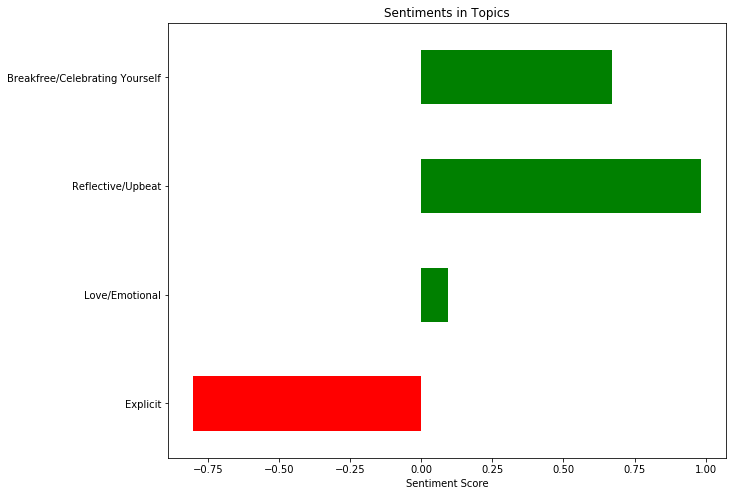

In [0]:
import numpy as np
plt.figure(figsize=(10,8))
df_post_topic.groupby('dominant_topic')['sentiment'].median().plot(kind='barh', color=(df_post_topic.groupby('dominant_topic')['sentiment'].mean() > 0).map({True: 'g',False: 'r'}));
plt.xlabel('Sentiment Score');
plt.ylabel('');
plt.title('Sentiments in Topics');
plt.yticks(np.arange(4), ('Explicit','Love/Emotional','Reflective/Upbeat','Breakfree/Celebrating Yourself'));

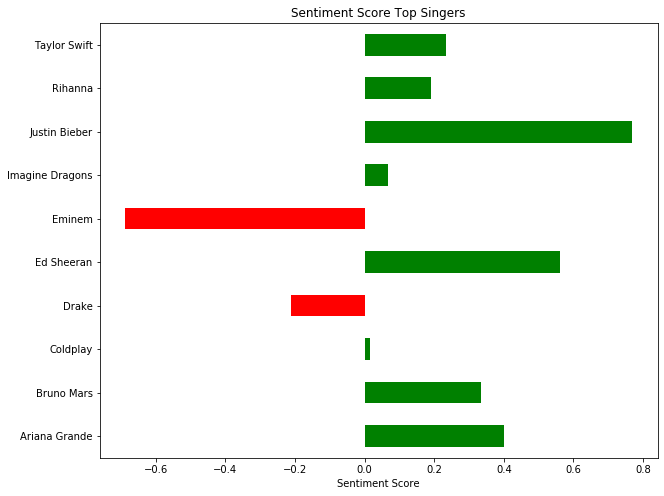

In [0]:
top10artist = df_post_topic.groupby('artist')['followers'].max().to_frame().reset_index().sort_values(by = 'followers', ascending = False).iloc[:10,0].values
top10artist2 = df_post_topic[df_post_topic['artist'].map(lambda x: x in top10artist)].copy()

plt.figure(figsize=(10,8))
top10artist2.groupby('artist')['sentiment'].mean()[:10].plot(kind='barh', color=(top10artist2.groupby('artist')['sentiment'].mean()[:10] > 0).map({True: 'g',False: 'r'}));
plt.xlabel('Sentiment Score');
plt.ylabel('');
plt.title('Sentiment Score Top Singers');

In [0]:
df_post_topic.to_csv('data_with_topic_and_sentiment.csv', index = False)

In [0]:
df_post_topic[df_post_topic['listener_count']>100000].shape

(709, 22)

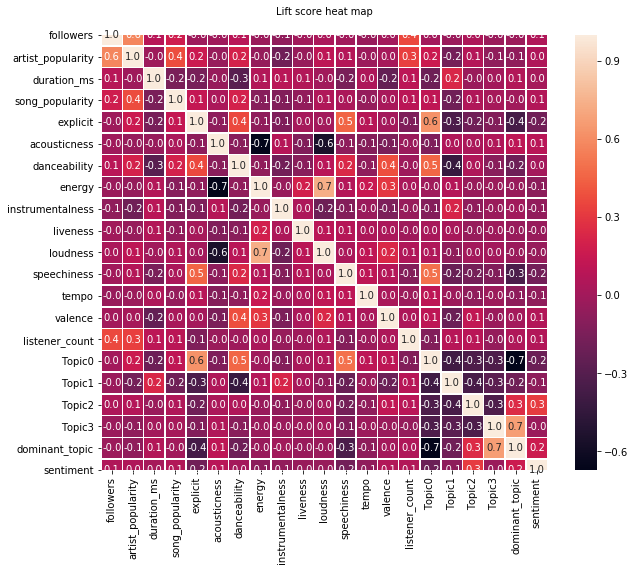

In [0]:
plt.figure(figsize=(10,8))
plt.title('Lift score heat map', fontsize = 10, pad = 20)
sns.heatmap(df_post_topic.corr(), linewidths=0.5, annot=True, fmt=".1f", annot_kws={"fontsize":10})

In [0]:
import pandas as pd
df = pd.read_csv('data_with_topic_and_sentiment (1).csv')

In [0]:
df['artist'].value_counts()[:10]

Imagine Dragons    55
Katy Perry         44
Coldplay           43
The Lumineers      43
blackbear          39
Ed Sheeran         31
Nicki Minaj        24
Bryan Adams        23
Lukas Graham       22
Drake              22
Name: artist, dtype: int64

In [0]:
df['artist'].value_counts()[:15].index

Index(['Imagine Dragons', 'Katy Perry', 'Coldplay', 'The Lumineers',
       'blackbear', 'Ed Sheeran', 'Nicki Minaj', 'Bryan Adams', 'Lukas Graham',
       'Drake', 'Eminem', 'Justin Bieber', 'Taylor Swift', 'Ariana Grande',
       'Travis Scott'],
      dtype='object')

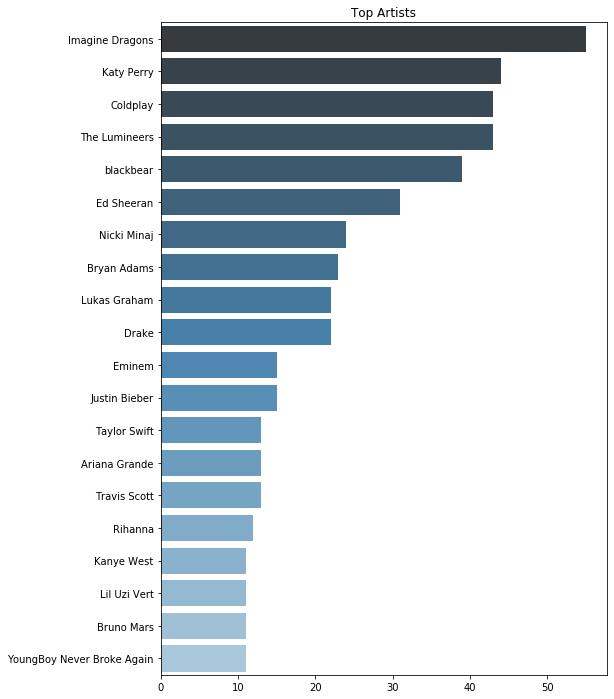

In [0]:
import seaborn as sns; 
plt.figure(figsize=(8,12))
plt.title("Top Artists")
ax = sns.barplot(y=df['artist'].value_counts()[:20].index, x=df['artist'].value_counts()[:20].values, palette="Blues_d", orient='h')

In [0]:
# word cloud
from nltk.util import ngrams
from collections import Counter

unigram = Counter(ngrams(all_words, 1))
output = pd.DataFrame.from_dict(unigram, orient='index').reset_index()

output.columns = ['Word', 'Count']
output = output.sort_values(by = ['Count'], ascending = False)
for each in range(len(output)):
    output.loc[each,'Word'] = str(output.loc[each,'Word'])[2:-3]
output.reset_index(inplace = True)
output = output.drop('index', axis = 1)
output.to_csv('ngram.csv')
output['Word'][:10]

0     n't
1    like
2    know
3    yeah
4     got
5    love
6     're
7     get
8     'll
9     let
Name: Word, dtype: object

## Modeling

In [0]:
new_df = pd.read_csv('data_with_topic_and_sentiment.csv')
new_df.drop(columns=['name','track uri','artist','release_date','lyrics','song_popularity','Playlist_Name','filtered_lyrics'], inplace = True)
new_df.head()

,followers,artist_popularity,duration_ms,explicit,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,listener_count,Topic0,Topic1,Topic2,Topic3,dominant_topic,sentiment
0,4027757,77,532266,False,0.000187,0.378,0.733,0.001950,0.0582,-4.935,0.0331,118.454,0.164,139370.0,0.0,0.94,0.00,0.06,1,-0.9951
1,941336,68,377373,False,0.000012,0.488,0.976,0.029500,0.0670,-4.165,0.1420,143.988,0.404,72344.0,0.0,0.49,0.00,0.50,3,-0.9962
2,1767902,73,188866,False,0.001560,0.439,0.987,0.000016,0.4240,-3.576,0.2200,163.393,0.378,58497.0,0.0,0.22,0.33,0.45,3,-0.9970
3,1966405,70,185016,False,0.000103,0.452,0.995,0.359000,0.2040,-3.958,0.0752,100.043,0.237,47733.0,0.0,0.56,0.07,0.37,1,-0.9947
4,4027757,77,486226,False,0.000083,0.309,0.882,0.107000,0.0976,-4.054,0.0629,123.558,0.174,111701.0,0.0,0.32,0.09,0.59,3,0.9807


In [0]:
import numpy as np
new_df['followers'] = np.log(new_df['followers'])
new_df['duration_ms'] = new_df['duration_ms']/60000
new_df['explicit'] = new_df['explicit'].astype(int)
new_df['sentiment_positive'] = (new_df['sentiment']>0.7).astype(int)
new_df['sentiment_negative'] = (new_df['sentiment']<-0.7).astype(int)
new_df['sentiment_neutral'] = (~(new_df['sentiment_positive'] | new_df['sentiment_negative'])).astype(int)
new_df['listener_count'] = np.log(new_df['listener_count']+1)
new_df = new_df[~new_df.isin([np.nan, np.inf, -np.inf]).any(1)]
new_df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,followers,artist_popularity,duration_ms,explicit,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,listener_count,Topic0,Topic1,Topic2,Topic3,dominant_topic,sentiment,sentiment_positive,sentiment_negative,sentiment_neutral
0,15.208720,77,8.871100,0,0.000187,0.378,0.733,0.001950,0.0582,-4.935,0.0331,118.454,0.164,11.844895,0.0,0.94,0.00,0.06,1,-0.9951,0,1,-2
1,13.755055,68,6.289550,0,0.000012,0.488,0.976,0.029500,0.0670,-4.165,0.1420,143.988,0.404,11.189202,0.0,0.49,0.00,0.50,3,-0.9962,0,1,-2
2,14.385304,73,3.147767,0,0.001560,0.439,0.987,0.000016,0.4240,-3.576,0.2200,163.393,0.378,10.976748,0.0,0.22,0.33,0.45,3,-0.9970,0,1,-2
3,14.491718,70,3.083600,0,0.000103,0.452,0.995,0.359000,0.2040,-3.958,0.0752,100.043,0.237,10.773399,0.0,0.56,0.07,0.37,1,-0.9947,0,1,-2
4,15.208720,77,8.103767,0,0.000083,0.309,0.882,0.107000,0.0976,-4.054,0.0629,123.558,0.174,11.623590,0.0,0.32,0.09,0.59,3,0.9807,1,0,-2


In [0]:
y = new_df['listener_count']
X = new_df.loc[:,new_df.columns != 'listener_count']
# X.drop(columns = ['followers','artist_popularity','Topic0','Topic1', 'Topic2', 'Topic3','dominant_topic','sentiment','sentiment_positive','sentiment_negative','sentiment_neutral'],inplace = True)

In [0]:
# X1 = new_df[['followers','duration_ms','Topic0','Topic1', 'Topic2', 'Topic3','sentiment']]

Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, random_state=0,n_estimators=500)

In [0]:
regr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [0]:
from sklearn.metrics import r2_score
r2_score(y, regr.predict(X), sample_weight=None)

0.7480370273820642

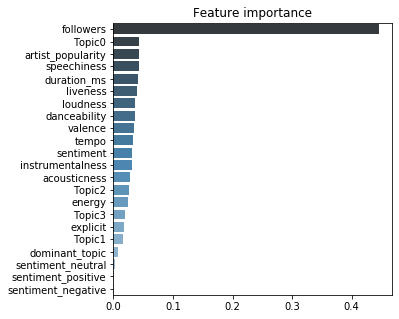

In [0]:
# Feature importannce
import seaborn as sns; 
ft_imp = pd.Series(data=regr.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(5,5))
plt.title("Feature importance")
ax = sns.barplot(y=ft_imp.index, x=ft_imp.values, palette="Blues_d", orient='h')

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
regr1 = RandomForestRegressor(max_depth=10, random_state=0,n_estimators=500)
regr1.fit(X_train, y_train)
r2_score(y_test, regr.predict(X_test), sample_weight=None)

0.7393548708743798

Random Forest Classifier

In [0]:
# 100k seems optimal cutoff based on manual survey
np.log(100000)

11.512925464970229

In [0]:
y1 = (y>11.5).astype(int)

In [0]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.20, random_state=42)

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=10, random_state=0,n_estimators=500)
rf_clf.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
X_test1.shape

(595, 22)

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1, rf_clf.predict(X_test1))

array([[419,  18],
       [ 94,  64]])

Linear Regression

In [0]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# X2 = sm.add_constant(X)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         listener_count   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     72.19
Date:                Sun, 01 Dec 2019   Prob (F-statistic):          8.83e-247
Time:                        06:23:10   Log-Likelihood:                -5880.7
No. Observations:                2974   AIC:                         1.181e+04
Df Residuals:                    2952   BIC:                         1.194e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
followers              0.4966      0

Decision Tree

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

clf = DecisionTreeRegressor(random_state=0, max_depth=4)
clf.fit(X1,y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [0]:
from sklearn import tree
with open('decision_tree.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

## Recommendation

In [0]:
df_post_topic = df

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
cv=CountVectorizer(tokenizer=LemmaTokenizer(), ngram_range=(1,2), stop_words='english', max_features=1250)
word_count_vector=cv.fit_transform(df_post_topic.lyrics.values)
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(word_count_vector)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [0]:
# with respect to one song how similar is this only based on TF-IDF
from sklearn.metrics.pairwise import linear_kernel

index=267
cosine_similarities = linear_kernel(tf_idf_vector[index:index+1], tf_idf_vector).flatten()
related_song_indices = cosine_similarities.argsort()[:-6:-1]
recom=list(related_song_indices)

for i in recom:
  print(df_post_topic.iloc[[i]]['name'] )


267    Shape of You
Name: name, dtype: object
1236    Me and Your Mama
Name: name, dtype: object
1586    CoCo
Name: name, dtype: object
412    I Think I'm In Love
Name: name, dtype: object
634    Can't Feel My Face
Name: name, dtype: object


## Insights

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_insights=df_post_topic
df_insights.columns

Index(['name', 'track uri', 'artist', 'followers', 'artist_popularity',
       'release_date', 'lyrics', 'duration_ms', 'song_popularity', 'explicit',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'Playlist_Name', 'listener_count', 'filtered_lyrics', 'Topic0',
       'Topic1', 'Topic2', 'Topic3', 'dominant_topic', 'sentiment'],
      dtype='object')

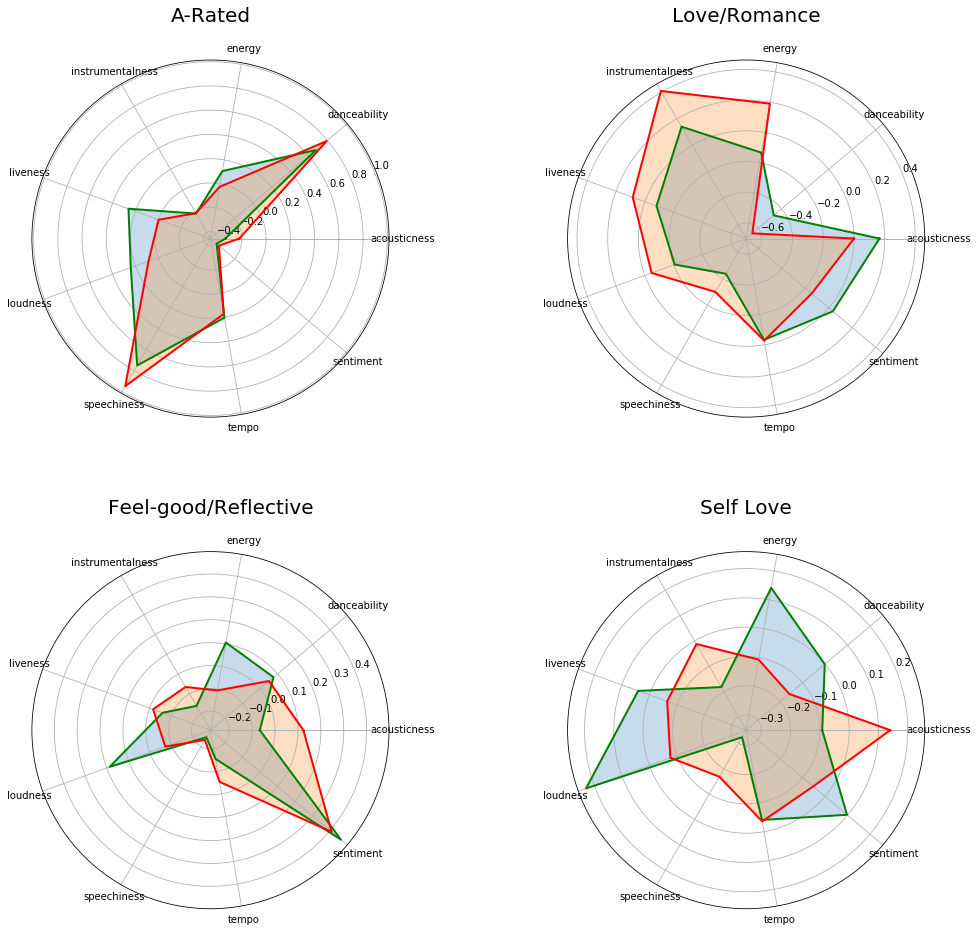

In [0]:
labels=np.array(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo','sentiment'])

topic_list = ['A-Rated','Love/Romance','Feel-good/Reflective','Self Love']

scaler.fit(df_insights[labels])
df_insights[labels] = scaler.transform(df_insights[labels])

fig = plt.figure(figsize = (16,16))

for each in range(4):
  df_insights_topic = df_insights[df_insights['dominant_topic']==each]
  hit_val = df_insights_topic[df_insights_topic['listener_count']>100000][labels].mean()
  fail_val = df_insights_topic[df_insights_topic['listener_count']<100000][labels].mean()

  angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
  # closing the plot by concatenating the first value
  hit_val=np.concatenate((hit_val,[hit_val[0]]))
  fail_val=np.concatenate((fail_val,[fail_val[0]]))
  angles=np.concatenate((angles,[angles[0]]))

  ax = fig.add_subplot(220+each+1, polar=True)
  fig.subplots_adjust(hspace=.3, wspace=0.5)
  # offset = 2

  ax.plot(angles, hit_val, 'g-', linewidth=2)
  ax.fill(angles, hit_val, alpha=0.25)

  ax.plot(angles, fail_val, 'r-', linewidth=2)
  ax.fill(angles, fail_val, alpha=0.25)

  ax.set_thetagrids(angles * 180/np.pi, labels)
  ax.set_title(topic_list[each], fontsize=20, pad=20)

ax.grid(True)